<h1>DATA VISUALISATION</h1>

# PRELIMINARIES:
The population of Square Island (Fig. 1), a territory perfectly aligned with the four cardinal
directions (North, East, South, West), was established in three migration waves, which are
reflected in the genetic makeup of the inhabitants.
The earliest wave preceded the other two by a long margin. It consisted of hunter-gatherers
whose genetic makeup had been distributed uniformly across the whole island before the next
two waves arrived. The second migration wave entered the island through an isthmus, that is, a
narrow strip of land, which temporarily connected the South-Western corner of the island with
the nearest continent during a mini ice age period when the sea levels dropped. The new
arrivals were farmers who started to spread slowly, breaking new ground for farming and
advancing by about one mile with each generation. The third and last migration wave brought a
population of seafarers to the island’s shores.
We have data on the relative frequency of 7 genes (proportion of population with a given gene
expressed as a number between 0 and 1) as measured at various locations on the island. These
locations are spaced at equal intervals along the X coordinate (West to East) and Y coordinate
(South to North) over the entire area. Genes 1 and 2 are mutually exclusive alternatives (alleles)
that can appear at one specific position in the genome known as Locus 1. The same is valid for
genes 3 and 4, which are the only 2 alternatives for Locus 2, and genes 5, 6 and 7, which are the
three alleles that can appear in Locus 3. This means that in any given location (x,y) the relative
frequencies of Gene 1 and Gene 2 add up to 1, and so do the relative frequencies of Genes 3
and 4, and Genes 5, 6 and 7. The data is available as a CSV table (see file sqisland.csv)
with a header row and 9 columns, representing the attributes listed in Table 1.
So, we may know, for instance, that in a given location 70% of the population have Gene 1, and
the remaining 30% have Gene 2. Similarly, the proportion of the population in that location with
Gene 3 may be, say, 40%, which leaves the remaining 60% carrying Gene 4. Finally, the
individuals in that location that carry one of the genes 5–7 may be split as 25% : 40% : 35%.

# Given the sqisland.csv file:

# 2.2.1: For each of the 7 genes, produce a contour plot visualising how its relative frequency varies across the whole island

In [1]:
from matplotlib.pyplot import contourf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

I will import the data and divide it into <i>coordinates</i> and <i>genes</i>.

In [2]:
# Take the name of the data file as parameter, then import data and format with pandas
def get_data(file_name):
    data = pd.read_csv(file_name)

    # Store into variables
    coordinates = data[['X','Y']]
    genes = data[['Gene1','Gene2','Gene3','Gene4','Gene5','Gene6','Gene7']]
    
    return data, coordinates, genes

In [3]:
data, coordinates, genes = get_data("sqisland.csv")

Then, I will create the X and Y grid needed for plotting the genes on the island. I will use numpy's meshgrid to create the axis.

In [4]:
x = np.linspace(0, 9, 10)
y = np.linspace(0, 9, 10)

X, Y = np.meshgrid(x,y)

In order to use the information related to each gene, I will:
<br>
1) store each gene's column in a variable, <br>
2) turn each variable into a numpy array, <br>
3) reshape each numpy array into 10 by 10. <br>
Step 2 and 3 are needed in order for the genes' variables to be accepted as parameters by the contourf method.

In [5]:
for gene in range(1,8):
    # 1)
    exec(f'gene{gene} = genes[[\'Gene{gene}\']]')
    # 2)
    exec(f'gene{gene} = gene{gene}.to_numpy()')
    # 3)
    exec(f'gene{gene} = gene{gene}.reshape(10,10)')

I will then proceed to print individually each gene's contour plot.
<br>
Locus 1's genes will be the ones in <b>RED</b>, Locus 2's will be in <b>BLUE</b>, and Locus 3's will be in <b>GREY</b>.

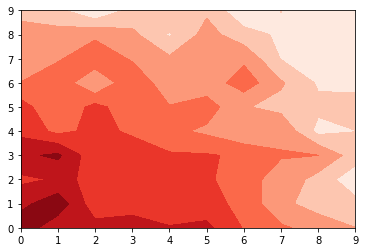

In [6]:
# Contour plot for Gene1
ax = contourf(x,y,gene1,cmap="Reds")

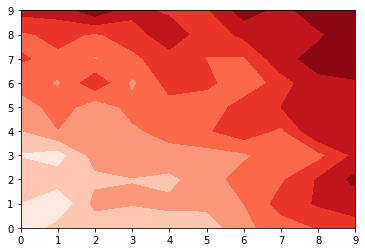

In [7]:
# Contour plot for Gene2
ax = contourf(x,y,gene2,cmap="Reds")

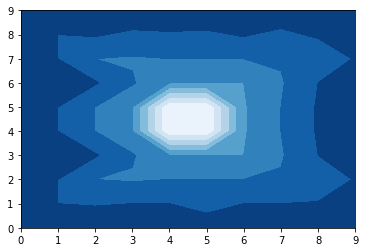

In [8]:
# Contour plot for Gene3
ax = contourf(x,y,gene3,cmap="Blues")

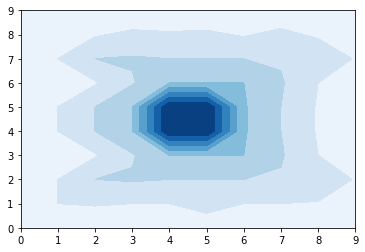

In [9]:
# Contour plot for Gene4
ax = contourf(x,y,gene4,cmap="Blues")

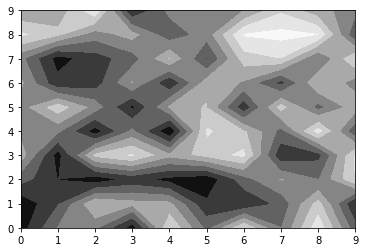

In [10]:
# Contour plot for Gene5
ax = contourf(x,y,gene5,cmap="Greys")

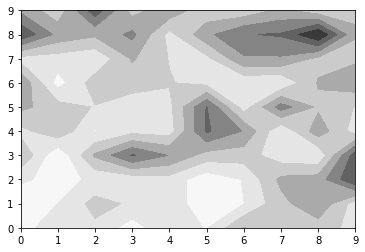

In [11]:
# Contour plot for Gene6
ax = contourf(x,y,gene6,cmap="Greys")

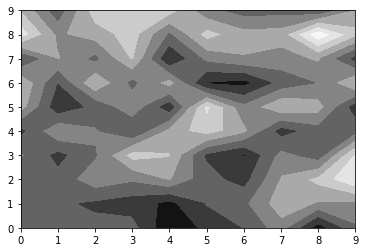

In [12]:
# Contour plot for Gene7
ax = contourf(x,y,gene7,cmap="Greys")

<br>

# 2.2.2: Study the contour plots to form a hypothesis about the most common alleles for Locus 1 and Locus 2 in: (a) the hunter-gatherers’ population; (b) in the farmers’ population.

# (a) Hunter-gatherers Locus1
# Gene 2 is the most common for hunter-gatherers

From the information that we have, we know that not only did the hunter-gatherers arrive in the island first, but they also expanded uniformely throughout the whole territory.
<br>
If we look at Gene1's contour plot (which, as we know, is the opposite allele of Gene2), we can see that population with Gene1 started to spread from the South-West corner of the island. This is indeed where the second wave of population, the farmers, arrived.

Furthermore, although we know that the farmers expanded by 1 mile every generation, we do not know how long ago they arrived on the island, and how many generations have passed. This is important to keep in mind, since there might be a chance that the farmers have been on the island for long enough to, just like the hunter-gatherers, uniformely spread on the territory. If this was true, it would mean that the contour plots for Locus1 do not hold any relevant information concerning hunter-gatherers not farmers, since their Genes mixed perfectly: this would mean that the expansion from the South-West of Gene2 side was done by the seafarers, thus meaning that the seafarers arrived on the island from that corner.

Based on the information provided, it is not known on which side of the island's shores the seafarers arrived.
<br>
Although we don't have enough information to discard this hypothesis, it seems unlikely that seafarers would arrive on an island from only one side; and even more unlikely that that side was exactly the same through which the farmers arrived.
<br>
I will therefore assume that with "The third and last migration wave brought a population of seafarers to the island's shores", means that the seafarers arrived from all directions on the shores of the island.

Hence, a more reasonable hypothesis would instead be that the seafarers hold little percentages of Locus1 in their genoma. This would imply that they had little to know influence on how the frequency of Gene1 and Gene2 varies across the island. In turn, this would imply that the contour maps for Locus1 indeed represent the migration from the South-West corner of the farmers.
<br>
This would lead to the hypothesis that the most common allele for hunter-gatherers is Gene2, since it's highest frequency is exactly in the North-East corner, which is exactly opposite to where the farmers arrived on the island.

# (a) Hunter-gatherers Locus2
# Gene 4 is the most common in hunter-gatherers

Following the same line of thought from the previous hypothesis, if we assume that the seafarers landed on the shores all around the island, we can deduce (by looking at the contour plot for Gene3) that the seafarers had a high presence of Gene3 in their genome, and very low Gene4. We can also deduce that, since the plots for Locus2 show no sign of influence from the farmers' South-West entrance in the island, the farmers have a really low presence of either Gene3 and Gene4.

Since we know that hunters-gatherer spread uniformely on the island before the arrive of seafarers, looking at the high concentration of Gene4 in the middle of the island (which is the furthest point from where the seafarers landed) we can hypothesise that the most common gene for the hunters-gateheres is gene4, which was spread evenly across the island, and which was then "overcome" by seafarers' Gene3.

# (b) Farmers Locus1
# Gene 1 is the most common allele for farmers

From the previous hypothesis, we can also logically deduce the most common allele for the farmers.
<br>
Since we hypothesised that the seafarers had little influence on the spreading of Gene1 and Gene2, it must be the case that Gene1 was prevalent in farmers, who spread it across the island starting from the South-West corner, as shown in Gene1's contours plot.

# (b) Farmers Locus2
# Farmers don't possess enough Gene3 nor Gene4 to make a hypotheses.

Finally, as mentioned multiple times above, the farmers have very little to no presence of Gene3 and Gene4 in their genome. This is reflected in the Locus2's contour plots: genetically-speaking, there is no evidence of the farmer's entrance in the island.
<br>
If farmers had a prevalence of Gene3, then in the relative contour plot the bottom left corner (where the farmers entered the island) would be darker than the rest of the shores of the island (where the seafarers arrived). 
If, on the other hand, the farmers had a prevalence of Gene4, the square in the middle of the island that is seen in Gene4's plot would have a triangle-shaped darker corner on the bottom left, since the farmers (as we can see from Locus 1's plots) did not spread past the diagonal midpoint line that goes from the top-left corner to the bottom-right corner.
<br>
It is important to note however, that this hypothesis holds true as long as we assume that the farmers have not been able to spread evenly across the island as the hunter-gatheres did.

<br>

# 2.2.3: Describe any significant characteristics of the genetic makeup of the population of seafarers.

The seafarers have <b>little to no presence of Gene1 nor Gene2</b> in their genoma. 
<br>
<br>
On the other hand, there is a <b>very high presence of Gene 3, and therefore very low presence of Gene 4</b>.

<br>

# 2.2.4: Calculate and display the variance of each of the 7 gene attributes

For this question, I will use numpy's <i>variance</i> function.

In [13]:
for gene_number in range(1,8):
    exec(f'print("Variance for Gene{gene_number}: ", gene{gene_number}.var())')

Variance for Gene1:  0.060582434371
Variance for Gene2:  0.06058243437099999
Variance for Gene3:  0.0010836736
Variance for Gene4:  0.001083673599999999
Variance for Gene5:  0.009514104445105358
Variance for Gene6:  0.020771410865005658
Variance for Gene7:  0.009074831617783595


<br>

# 2.2.5: Calculate the Pearson correlation between (a) Gene 1 and Gene 4; (b) Gene 1 and Gene 5. State if the null hypothesis of non-correlation can be rejected for either pair at the 95% significance level. Do these results agree with your hypothesis about the genetic makeup of the farmers from the second wave?

To answer this question, I will take advantage of scipy's <i>pearsonr</i> procedure.

In [14]:
from scipy.stats.stats import pearsonr

In order to be able to use the function, the genes' variables first need to be reshaped into a single column (100 by 1 array), and then squeezed into a single dimension array.


In [15]:
# (a) Gene1 and Gene4
g1g4 = pearsonr(np.squeeze(gene1.reshape(100,1)), np.squeeze(gene4.reshape(100,1)))
print(g1g4)

(0.07526456660171593, 0.4567315550997579)


In [16]:
# (b) Gene1 and Gene5
g1g5 = pearsonr(np.squeeze(gene1.reshape(100,1)), np.squeeze(gene5.reshape(100,1)))
print(g1g5)

(0.3601203240798584, 0.00023304482007153996)


In the case of <b>Gene1 and Gene4</b>, both the Pearson's correlation coefficient R very close to 0 instead of 1 or -1, and the p-value being 0.46% which is way bigger than 5% (since the significance level is 95%) lead us to the conclusion that we <b>fail to reject</b> the null hypothesis H0 of non-correlation, hence meaning that is very likely that the two genes have no correlation at all.

In the case of <b>Gene1 and Gene5</b>, although the correlation coefficient is not particularly high, the p-value being 0.00023% (which is way smaller than 5%) tells us that we can <b>reject</b> the null hypothesis H0 of non-correlation, hence meaning that there is a positive correlation between the two genes.

Yes, the results are in line with my hypotheses about the genetic makeup of the farmers, since, if farmers had a high presence of Gene3 and Gene4, then the contour map for Locus 2 would have shown a plot which was more skewed by the South-West direction of entrance of the farmers.

<br>

# 2.2.6: Apply principal component analysis (PCA) to the data consisting of the relative frequencies of Genes 1–7. Transform the data using all 7 principal components and calculate and display the variance for each of them.

Although I previously reasoned about the importance of standardising the data before applying PCA, in this case it is not needed: being the datapoints in this case frequencies, they are already all scaled between 0 and 1; this removes the need for dividing by the standard deviation. Furthermore, scikit's PCA alreay has the feature of centering (mean=0) the data.
<br>
Thus, using a StandardScaler before applying PCA is not necessary in this case.

In [17]:
from sklearn.decomposition import PCA

def pca(components, scaled_data):
    # Create object and fit to data
    pca = PCA(n_components=components)
    new_X = pca.fit_transform(scaled_data)
    
    return new_X, pca

In [18]:
# Apply PCA 
new_genes, pca_q2 = pca(7, genes)

# Print variance for each component
print("Here are the respective VARIANCES for each component:\n")
for component, counter in zip(range(0,7), range(1,8)):
    exec(f'print("Component{counter}: ", np.var(new_genes[:,component]))')

Here are the respective VARIANCES for each component:

Component1:  0.13092368728540024
Component2:  0.0214639174024307
Component3:  0.008184972783005964
Component4:  0.0021199853990578944
Component5:  6.470409027002374e-20
Component6:  1.1427230966470054e-33
Component7:  2.4804309408917016e-33


<br>

# 2.2.7: Compare the sums of variances of all 7 attributes before and after transforming the data via PCA. Comment briefly whether the result can be expected or not and why.

I will create separate variables for the value of the two sums of variances before and after PCA.

In [19]:
# Initialise the two variables to 
sum_before = 0
sum_after = 0

I need to turn the pandas dataframe into a numpy array first.

In [20]:
genes = genes.to_numpy()

Again, I will use numpy's var() function.

In [21]:
# For loop to compute the sum of the data before PCA.
for gene_number in range(7):
    sum_before += genes[:,gene_number].var()

# For loop to compute the sum of the data after PCA
for component_number in range(7):
    sum_after += new_genes[:,component_number].var()

In [22]:
# Print results
print(sum_before)
print(sum_after)

0.16269256286989464
0.1626925628698948


Yes, the result is to be expected. This is due to how PCA works: PCA looks for the new axes in the data space which has the most variance, then proceeds with finding new axes that have the same property but that are also orthogonal to the previously found axes. 
<br>
This means that PCA does not create new variance from the data points, but instead "rearranges" the existing datapoints in the existing data space in order to find the orientation with the most variance.
<br>
Thus, this means that the same total amount of variance is to be expected before and after applying PCA.

<br>

# 2.2.8: Plot the first two PCA components as contour plots visualising the relative frequencies of each component across the island. Compare the result to the contour plots for Gene 1 and Gene 3 (data before PCA). Which of the two pairs of plots do you find more helpful for the task of reconstructing the waves of migration? Do you expect the same result for a realistic data set with hundreds of genes and why?

I will use the PCA object and transformed data that I obtained earlier.
<br>
I will then store the first and the second principal components separately for easeness of use's sake.

In [23]:
# Initialise lists
component1 = []
component2 = []

# Iteratively get the values of first and second component and append in rispective list.
for coordinate in new_genes:
    component1.append(coordinate[0])
    component2.append(coordinate[1])

Once again in order to be able to use the contourf function, I will turn the two components' variables into nparrays.

In [24]:
component1 = np.array(component1)
component2 = np.array(component2)

And then reshape into 10 by 10 arrays before passing them to the contourf function.

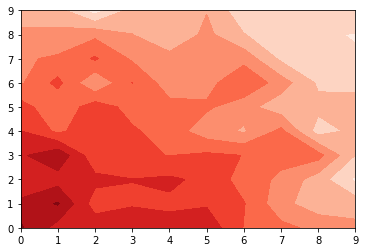

In [25]:
ax = contourf(x,y,component1.reshape(10,10),cmap="Reds")

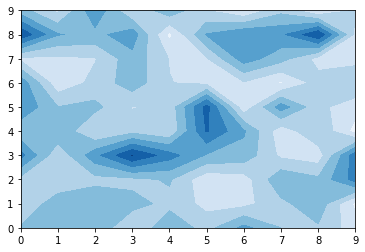

In [26]:
ax1 = contourf(x,y,component2.reshape(10,10),cmap="Blues")

The first step is to recognise that the PC1 plot has a striking similarity with Gene 1's contour plot (which represents the spread of farmers), whereas the PC2's plot has an even more striking similarity with Gene 6.
<br>
The first principal component summarises the maximum amount of variance as possible: its contour plot represents the frequencies of the combination of genes. Thus, considering the similarity between PC1's plot and Gene1's plot, we can speculate that the advancing of the farmers into the island led to their mixing with the local population of hunters-gatherers.
<br>
On the other hand, the plot for PC2 would perhaps suggest the presence of Gene 6 and how it's spread among the island.

 It's for this reasons that I believe that <b>the first pair of plots (the contour plots before PCA) is more helpful for the task of reconstructing the waves of migration</b>. 
<br>
This is because in this case we are only working with 7 total genes. It is therefore very feasible and helpful to look at the individual Genes' contour plots in order to make hypotheses about the migration waves.
<br>
Coversely, by looking at the first and second principal components plots it is still possible to arrive to the somewhat same conclusions, however -since the principal components are linear combinations of the initial variables- it is harder to create hypotheses, since there are more information "packed" in single plots.

For instance, looking at the contour plot for Gene3, it is clear (almost trivial) to speculate that the seafarers have been responsible for the expansion of Gene3 across the island since they are the ones who arrived on the island shores. 
<br>
On the contrary, if on one hand the contour plot for PC1 shows some information about the migration wave of farmers and possibly hunters-gatherers too, on the other hand by looking at both the contour plots for PC1 and PC2 it is considerably harder to make any assumption about the migration wave of the seafarers.

However, in a scenario in which we are using realistic dataset with hundreds of genes, I believe that -for all these reasons mentioned above- it would be more optimal to apply PCA and try to make hypotheses based on the principal components' contour plots. 
<br>
Trying to look at and make sense out of hundreds of genes would be tedious and extremelly demanding. 